<a href="https://colab.research.google.com/github/WelfLowe/ML4developers/blob/main/9_GPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

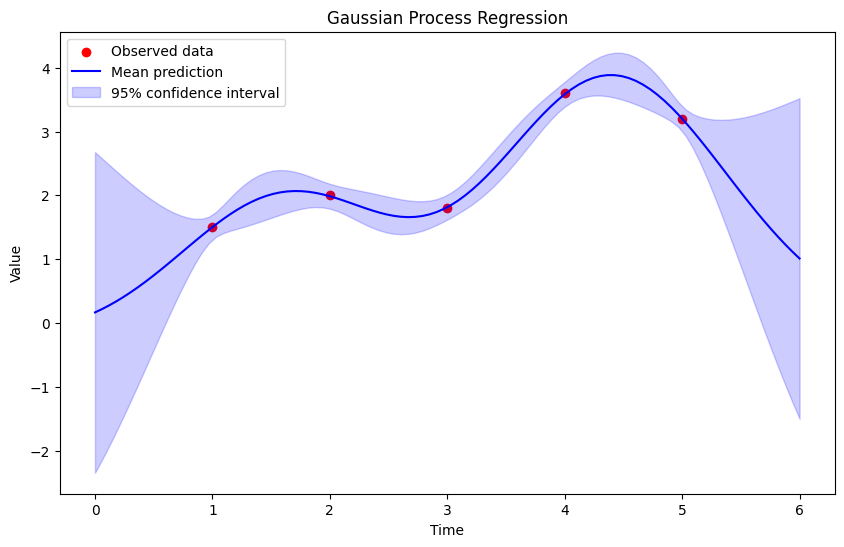

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Sample time-value measurements
# Replace these with your actual data
values = np.array([1.5, 2.0, 1.8, 3.6, 3.2])  # Corresponding measurements
time = np.linspace(0, len(values) - 1, len(values)).reshape(-1, 1)

# Define the kernel (e.g., RBF kernel with a constant factor)
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Initialize Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

# Fit the model to the data
gpr.fit(time, values)

# Predict values at new time points
time_pred = np.linspace(0, 6, 100).reshape(-1, 1)  # New time points for prediction
mean_prediction, std_prediction = gpr.predict(time_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(time, values, color='red', label='Observed data')  # Observed points
plt.plot(time_pred, mean_prediction, color='blue', label='Mean prediction')  # Predicted mean
plt.fill_between(
    time_pred.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color='blue',
    alpha=0.2,
    label='95% confidence interval'
)  # Uncertainty bounds
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()
